# Fare Prediction

Price of Fare depends on several factors, and we're going to look at some of the factors in this notebook.

In [461]:
# For data manipulation
import numpy as np
import pandas as pd

# For visulizations
import matplotlib.pyplot as plt
import seaborn as sns

In [520]:
# Reading the data
df = pd.read_excel("Data_Train.xlsx")
print("df", train_data.shape)
train_data.shape

df (10682, 13)


(10682, 13)

In [519]:
df.head(1)

,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Koklata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,d_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [468]:
# Price is the only integer column, so have to find myself the corr(By googling it).
df.corr()

,Price
Price,1.0


In [469]:
# I think these three features correlate pretty good than the others with price.

# Unique values of Categorical Features
print(df['Airline'].unique())
print("--------------------------------------------------------------------------------------------------------")
print(df['Destination'].unique())
print("--------------------------------------------------------------------------------------------------------")
print(df['Source'].unique())

# Will be dropping other categorical features

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
--------------------------------------------------------------------------------------------------------
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
--------------------------------------------------------------------------------------------------------
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [470]:
# Checking if any nulls are present
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [471]:
# Yes 1 route adn 1 total_stops, so 1 against 13354 others, i'll be dropping it
df.dropna(inplace = True)

In [472]:
df.shape

(10682, 11)

In [473]:
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [474]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

### Feature Engineering

In [475]:
# extracting information from 'date_of_journey' and storing in new columns
df["Date_of_Journey"] = pd.to_datetime(df['Date_of_Journey'])
df['month'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%y").dt.month
df['day'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%y").dt.day

In [476]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [477]:
# Since we have extracted information from Date_of_Journey, we can drop it
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

+ Departure time is when plane leaves
+ Arrival time is when plane lands at the destination

In [478]:
# Extracting hours from 'Dep_Time'
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
# Extractinf minutes
df['Dept_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Extracted the usefull information, we can drop Dep_Time
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [479]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [480]:
# Extracting hours from 'Arrival_Time'
df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
# Extractinf minutes
df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Extracted the usefull information, we can drop Dep_Time
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [481]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


Time taken by the place to reach its destination
i.e Departure Time - Arrival Time

In [482]:
duration = list(df['Duration'])
a = -1
for i in duration:
    a = a+1
    #Checking if duration contains only hours or mins
    if len(i.split()) != 2:
        # Add 0 minutes
        # converting to pandas series to perform contains function
        if (pd.Series(i).str.contains('h')[0]):
            duration[a] = i.strip() + " 0m"
         # Add 0 hours
        else:
            duration[a] = "0h " + duration[a]

# Extracting hours and min from duration            
duration_hours = []
duration_mins = []
for i in duration:
    duration_hours.append(int(i.split('h')[0].split(" ")[0]))
    duration_mins.append(int(i.split('m')[0].split(" ")[1]))

In [483]:
# adding duration_hours and duration_mins to our dataframe
df['duration_hours'] = duration_hours
df['duration_mins'] = duration_mins

In [484]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [485]:
# Extracted the usefull information from 'Duration', so we can drop it
df.drop(['Duration'], axis = 1, inplace = True)

### Handeling Categorical Data

Airline vs Price

In [486]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

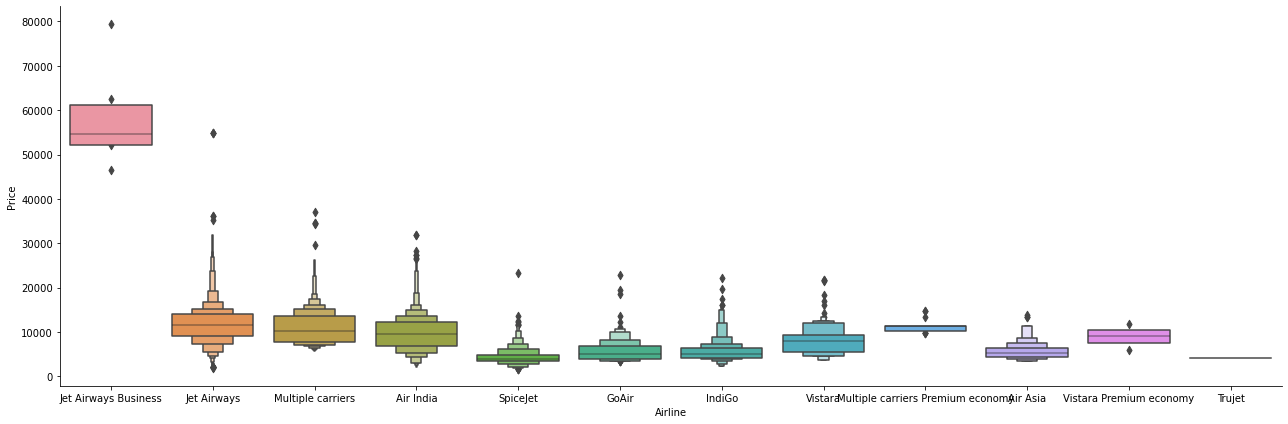

In [487]:
sns.catplot(x = 'Airline', y = 'Price', data = df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show

We can se that jet airways Business have highest price, apart from that almost all airlines have similar median

In [488]:
# Airline column has nominal Categorical data, we will use One Hot Encoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Source vs Price

In [489]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

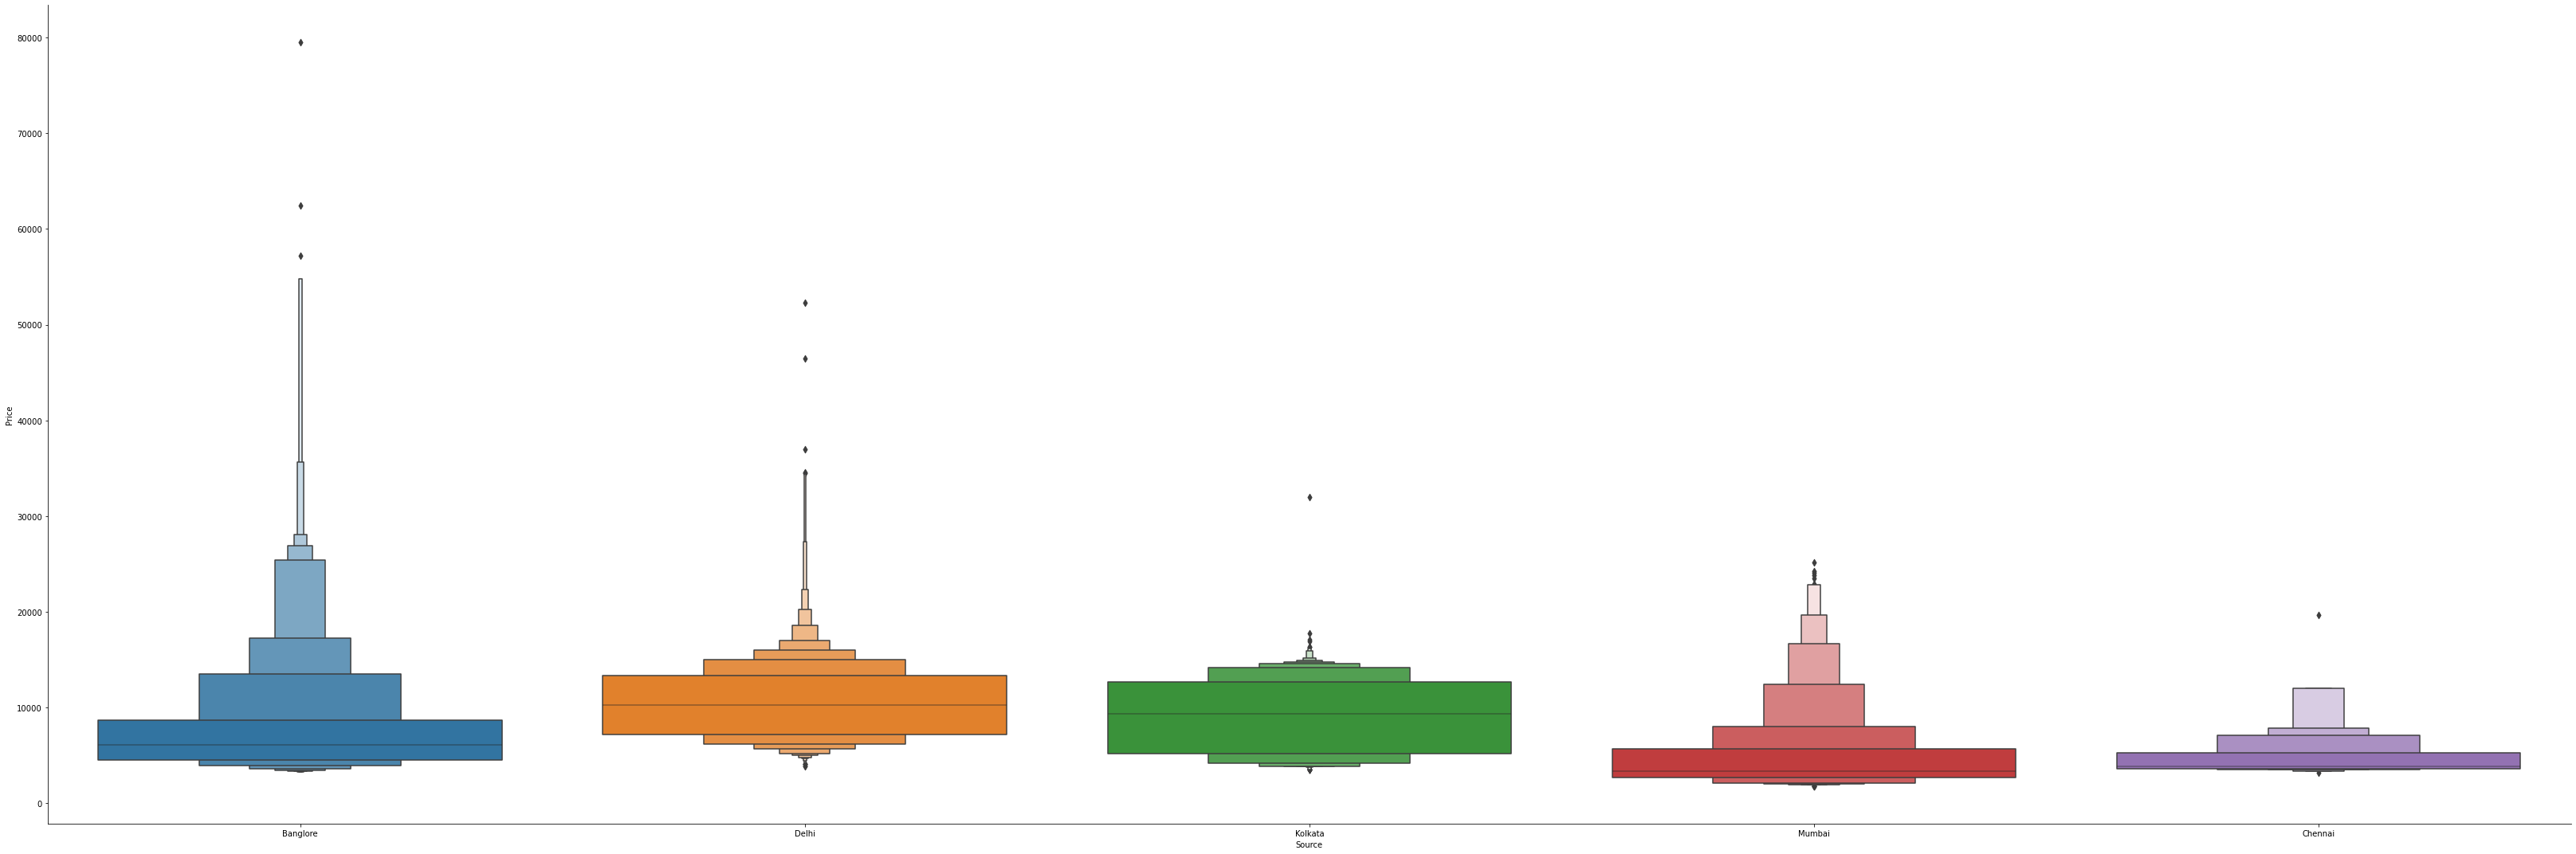

In [490]:
sns.catplot(x = 'Source', y = 'Price', data = df.sort_values('Price', ascending = False), kind = 'boxen', height = 15, aspect = 3)
plt.show()

In [491]:
# as souce column has nominla categorical data, we will perform OneHotEncoding
source = df[['Source']]
source = pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Destination vs Price

In [492]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

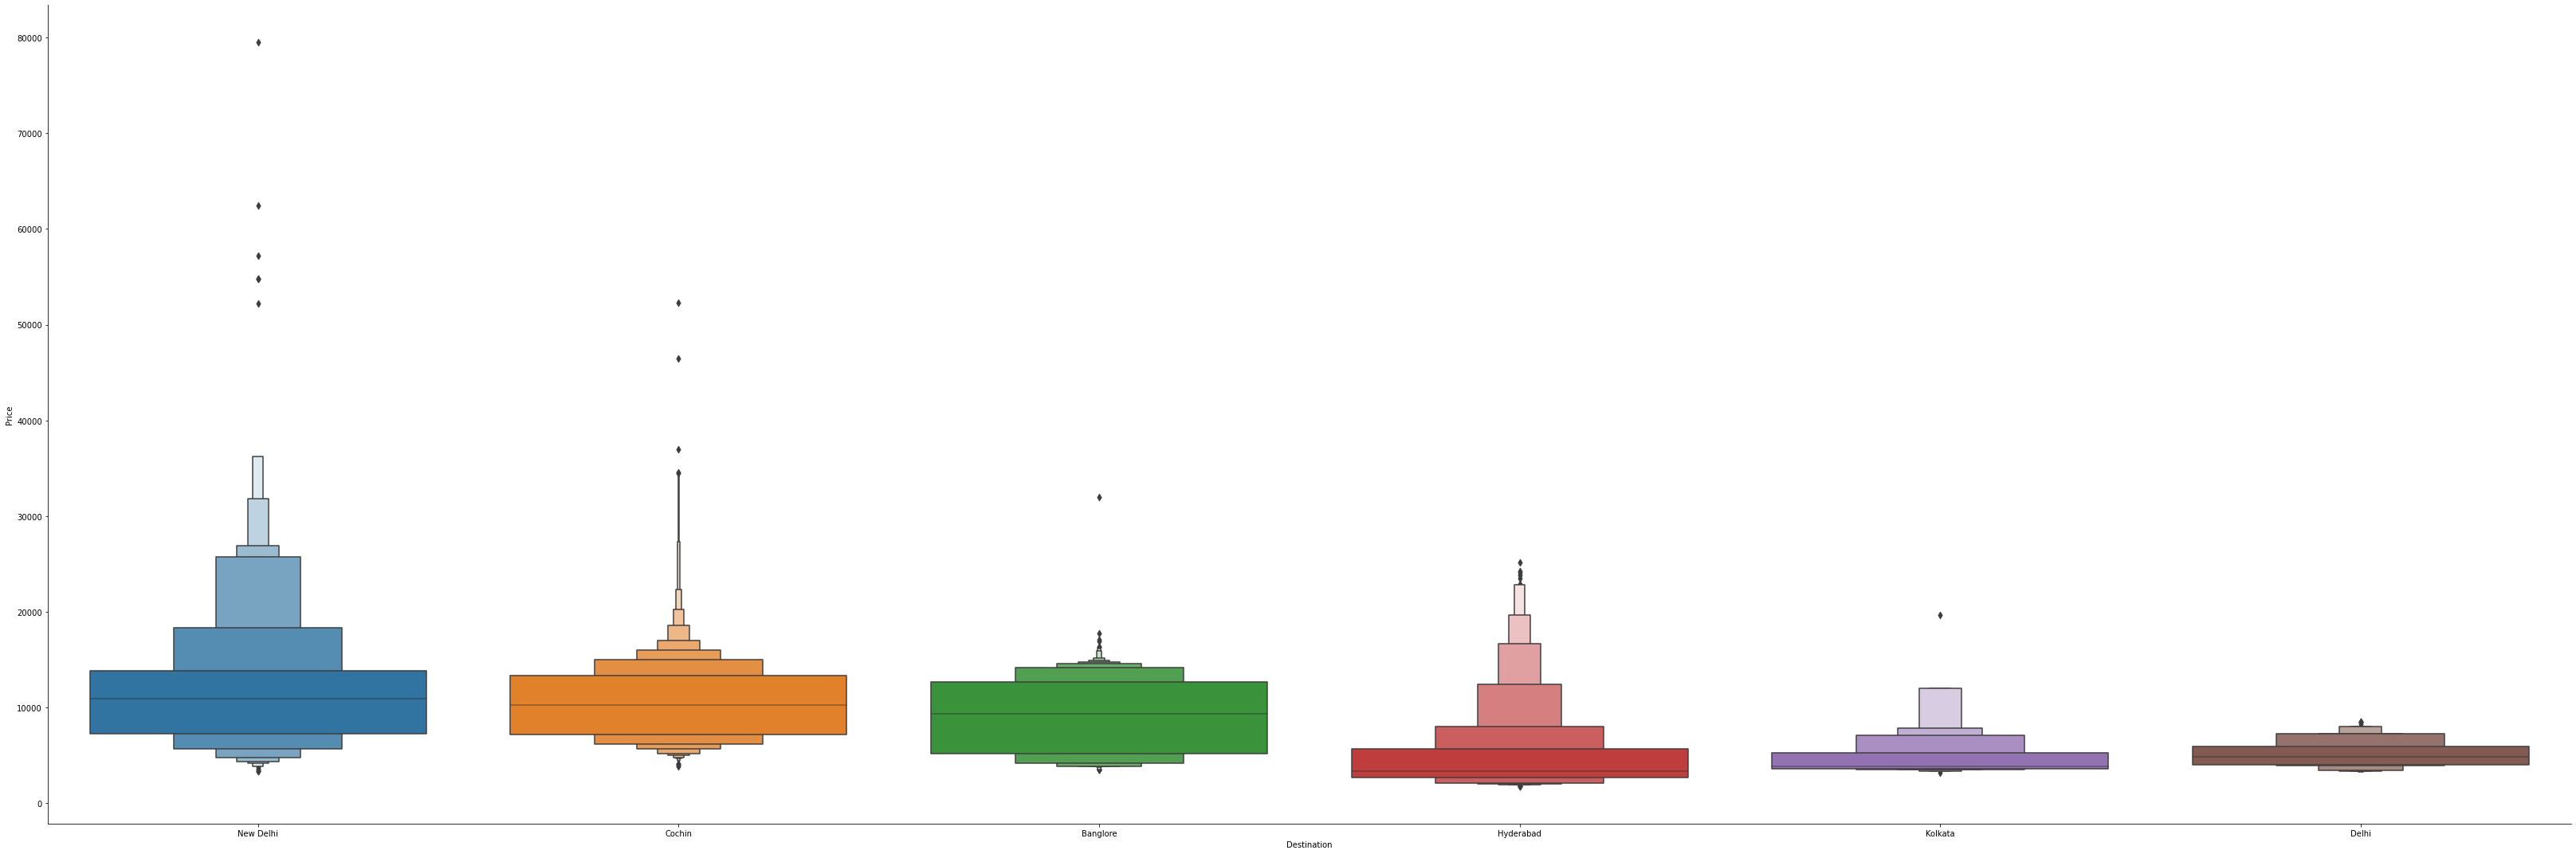

In [493]:
# Destination vs Price
sns.catplot(x = 'Destination', y = 'Price', data = df.sort_values('Price', ascending = False), kind = 'boxen', height = 15, aspect = 3)
plt.show

In [494]:
# as Destination column has nominal categorical data, we will perform OneHotEncoding
destination = df[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [495]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [496]:
print(10492/13353)
df['Additional_Info'].value_counts()
# 78% of the records have NO INFO as the additional info ,so we drop that column
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

0.7857410319778327


In [497]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,6,24,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1 stop,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1 stop,8625,5,27,11,25,19,15,7,50


In [498]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [499]:
# As total_stops column has Ordinal Categorical type of data, We will perform Label Encoding
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [500]:
corr_df = df

In [501]:
# Merge all dataframe
# df + airline + source + destination

df = pd.concat([df,Airline,source,destination], axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [502]:
pd.set_option('display.max_columns',None)

In [503]:
# Dropping the innecessary columns
df.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
df.head()

,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [504]:
df_train.shape

(13353, 30)

### Renaming the column names

In [505]:
rename = {'Airline_Air India':'Air India','Airline_GoAir':'GoAir','Airline_IndiGo':'IndiGo','Airline_Jet Airways':'Jet Airways','Airline_Jet Airways Business':'Jet Airways Business','Airline_Multiple Carriers':'Mutiple_Carriers','Airline_Multiple carriers Premium economy':'Multiple carriers Premium economy','Airline_SpiceJet':'SpiceJet','Airline_Trujet':'Trujet','Airline_Vistara':'Vistara','Airline_Vistara Premium economy':'Vistara Premium economy','Source_Chennai':'s_Chennai','Source_Delhi':'s_Delhi','Source_Kolkata':'s_Koklata','Source_Mumbai':'s_Mumbai','Destination_Cochin':'d_Cochin','Destination_Delhi':'d_Delhi','Destination_Hyderabad':'d_Hyderabad','Destination_Koklata':'d_Kolkata','Destination_New Delhi':'d_New Delhi','Destination_Kolkata':'d_Kolkata','Airline_Multiple carriers':'Multiple carriers'}
df.rename(columns=rename, inplace = True)
df.head()

,Total_Stops,Price,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Koklata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,d_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   month                              10682 non-null  int64
 3   day                                10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dept_min                           10682 non-null  int64
 6   Arr_hour                           10682 non-null  int64
 7   Arr_min                            10682 non-null  int64
 8   duration_hours                     10682 non-null  int64
 9   duration_mins                      10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

In [507]:
df.isnull().sum()

Total_Stops                          0
Price                                0
month                                0
day                                  0
Dep_hour                             0
Dept_min                             0
Arr_hour                             0
Arr_min                              0
duration_hours                       0
duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
s_Chennai                            0
s_Delhi                              0
s_Koklata                            0
s_Mumbai                             0
d_Cochin                 

### Train and Test data
Using train_test_split

In [508]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

In [509]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [510]:
X_train.head(3)

,Total_Stops,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Koklata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,d_New Delhi
3628,0,4,15,16,55,19,55,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9540,1,1,4,7,25,13,35,6,10,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4480,0,3,4,11,10,14,5,2,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [511]:
X_test.head(3)

,Total_Stops,month,day,Dep_hour,Dept_min,Arr_hour,Arr_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,s_Chennai,s_Delhi,s_Koklata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,d_New Delhi
6334,0,4,24,9,30,12,20,2,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6284,1,6,27,6,0,12,35,6,35,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9760,0,4,15,13,0,15,50,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [512]:
y_train.head(3)

3628    4823
9540    4563
4480    4544
Name: Price, dtype: int64

In [513]:
y_test.head(3)

6334     3919
6284    10791
9760     4591
Name: Price, dtype: int64

## Feature Selection
It is process where we find the best features which will contribute and have good relation with our Target variable

In [514]:
X_train.shape

(8545, 29)

In [515]:
X_train.columns

Index(['Total_Stops', 'month', 'day', 'Dep_hour', 'Dept_min', 'Arr_hour',
       'Arr_min', 'duration_hours', 'duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 's_Chennai', 's_Delhi', 's_Koklata',
       's_Mumbai', 'd_Cochin', 'd_Delhi', 'd_Hyderabad', 'd_Kolkata',
       'd_New Delhi'],
      dtype='object')

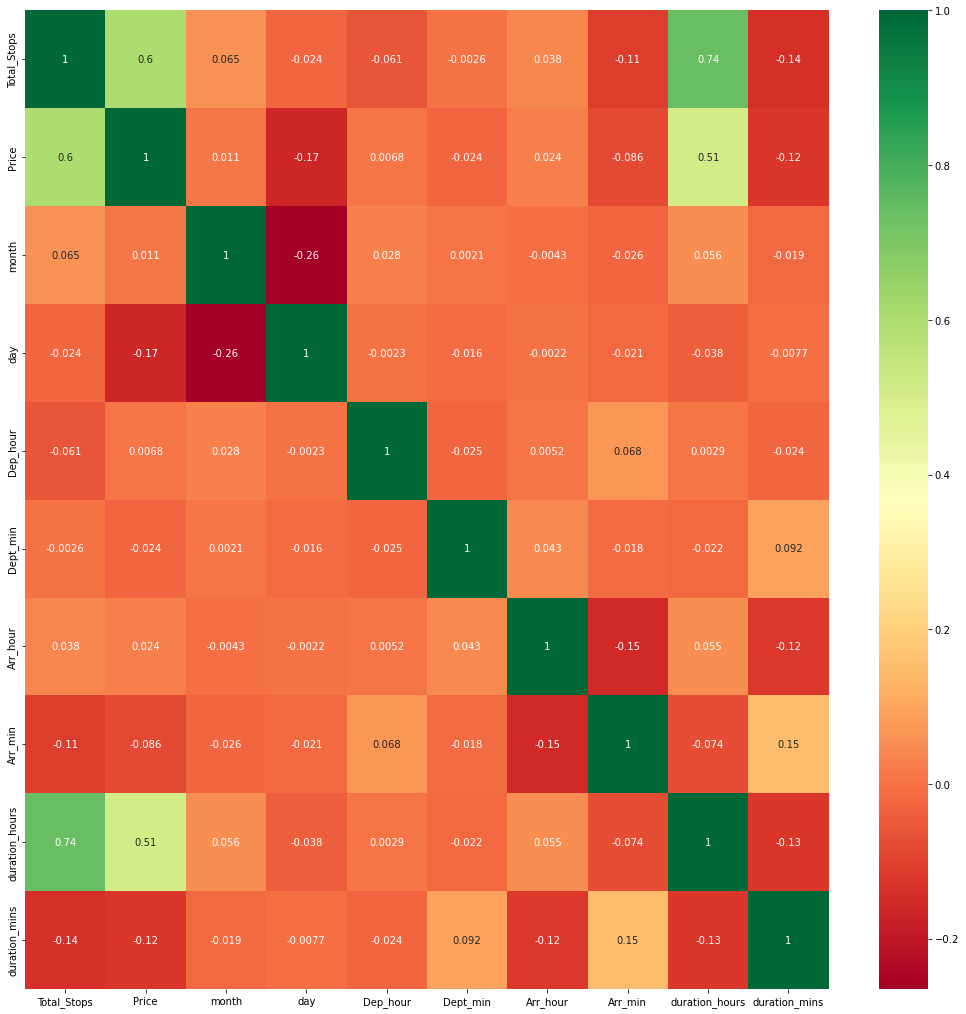

In [516]:
# Finding correlation between Independent and Dependent Feature
plt.figure(figsize=(18,18))
sns.heatmap(corr_df.corr(),annot=True,cmap='RdYlGn')

plt.show()

If two independent features are highly correlated, then we can drop any one of them as both are doing almost same task.

In [521]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8026475562202814

In [538]:
y_pred = model.predict(X_test)

# Saving the model for re-use

In [522]:
import pickle

In [531]:
file=open('filght_model.pkl',"wb")

pickle.dump(model,file)

file.close()

In [536]:
pkl_model = open('filght_model.pkl',"rb")

predct  = pickle.load(pkl_model)

### Done!!!